# **Visualizations** #

### **7.1 Visualizations in Data 8 and DATA 100 So Far**

So far, we have covered the following data visualizations: 
* Line plots
* Scatter Plots 
* Histograms 

### **Line Chart, Scatterplots, and Histograms**
<img src="https://ds100.org/course-notes/visualization_1/images/line_chart_viz.png" alt="Line Chart" style="display:inline-block; margin-right:10px; width:410px; height=450px;">
<img src="https://ds100.org/course-notes/visualization_1/images/scatter.png" alt="Line Chart" style="display:inline-block; margin-right:10px; width:410px; height=450px;">
<img src="https://ds100.org/course-notes/visualization_1/images/histogram_viz.png" alt="Line Chart" style="display:inline-block; margin-right:10px; width:410px; height=450px;">


### **7.2 Goals of Visualization**

1) To broaden our understanding of our data 
    * Investigating relationships between variables and summarizing those trends visually 

2) Communicate results / conclusions to to others.

### **7.3 An Overview of Distributions**

A distribution describes both the set of values that a single variable can take, along with how **distributed** a variable is across its possible values

Example: 
* If we're intrested in the distribution of students across DATA 100 discussions, the set of possible values is a list of disussion sections (10-11am, 11-12pm, etc)
* The frequency that each of those values occurs is the number of students enrolled in each section 

#### **Distributions Properties**
1) The total frequency must sum to $100\%$
2) Total count should sum to the total number of datapoints if we're using raw counts 

### **7.4 Variable Types should dictate Plot Choice**

The following image lays out the 4 variable types we will discuss in DATA $100$

<img src="https://ds100.org/course-notes/visualization_1/images/variable_types_vis_1.png" alt="Line Chart" style="display:inline-block; margin-right:10px; width:500px; height=550px;">


**Quantitative Discrete**: This type of data consists of numerical values that represent counts or whole numbers. Discrete data is finite and often represents items that can be counted.
* Number of students in a class
* Number of cars in a parking lot

**Quantitative Continuous**: Quantitative continuous data represents measurements that can take any value within a range. Unlike discrete data, continuous data can be measured at infinitely fine levels of precision. 
* Height
* Weight

**Qualitative Ordinal**: Qualitative ordinal data consists of categories that have a natural order or ranking. In ordinal data, the categories have a defined sequence or hierarchy, but the differences between the categories may not be equal.
* Ranks such as first place, second place, third place

**Qualitative Nominal**: Qualitative nominal data consists of categories that do not have a natural order or ranking. 
* Colors
* Types of fruit


Before we do any visualization, we *must* identify the type(s) of variables we're working with. From then, we can then select the appropriate type of plot

### **7.5 Qualitative Variables: Bar Plots**

A **bar plot** is one of the most common ways of displaying the distribution of a **qualitative** (categorical) variable 

In [28]:
import pandas as pd
import numpy as np

wb = pd.read_csv("world_bank.csv", index_col=0)

#### **7.5.2 Plotting in Matplotlib**

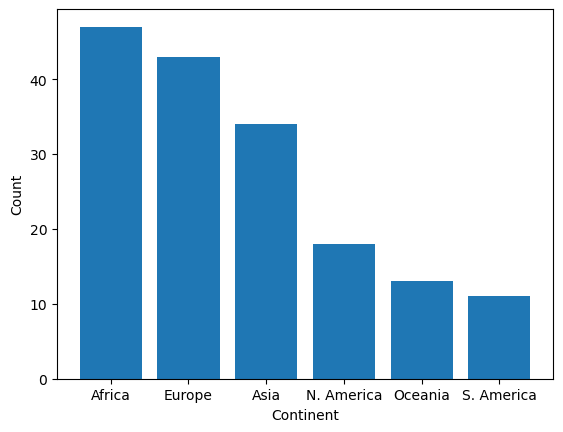

In [5]:
import matplotlib.pyplot as plt # matplotlib is typically given the alias plt

continent = wb['Continent'].value_counts()
plt.bar(continent.index, continent)
plt.xlabel('Continent')
plt.ylabel('Count');


Here, we can see that each **category** represents one of Earth's `Continent`'s, where the height of each bar represents the frequency of a certain variable for each category.

Notice also that we also had to manually add our own labels, using `plt.xlabel` and `plt.ylabel`

We can also add out own title using `plt.title`

#### **7.5.3 Plotting in Seaborn**

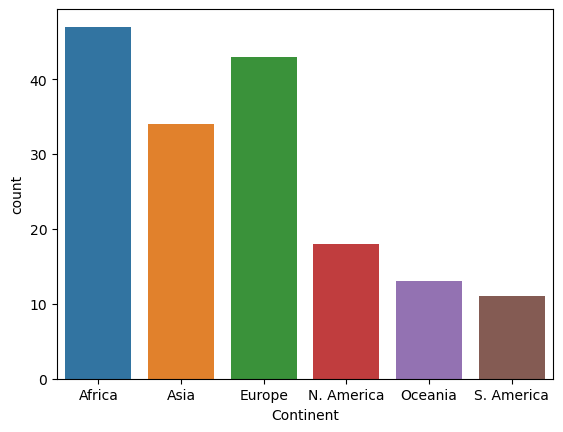

In [10]:
import seaborn as sns # seaborn is typically given the alias sns
sns.countplot(data = wb, x = 'Continent');

The general structure of a `seaborn` call involves passing in the entire `DataFrame`, and then specifying which specifc columns you want to plot 

* In `seaborn.countplot`, the column we want to see if specified by the `x` argument, and the `Dataframe` we want to use is specified by the `data` argument 

* So **in general**, `countplot` is used to see the distribution of counts for each specific category, which we specify in the `x` argument of our `data`

### **Distribution of Quantitative Variables**

Let's not plot the distribution of `Gross national income per capita`.

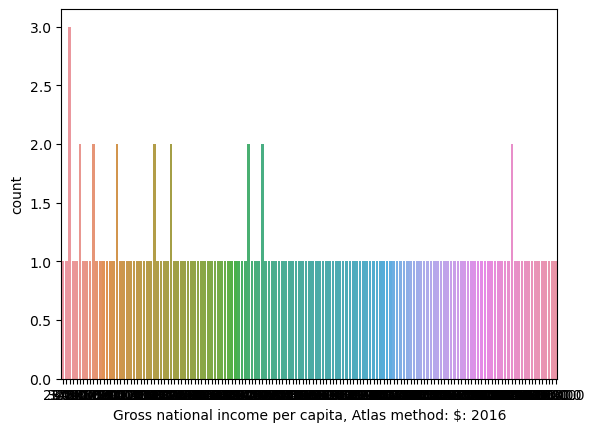

In [11]:
sns.countplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016');

Now, this doesn't look that great. 

* Essentialy what's happening is that for each *unique* value in `'Gross national income per capita, Atlas method: $: 2016`, we're creating its own respective bar. 

* We refer to this type of situation, where we have too many values on the screen, as **overplotting**

* Rather than using a bar plot, let's try using some of the following to visualize the distribution of a continuous variable: 
    * Histogram 
    * Box Plot 
    * Violin Plot

#### **Box Plots and Violin Plots**

Both box and violing plots display the distribution of a variable using information about **quartiles**

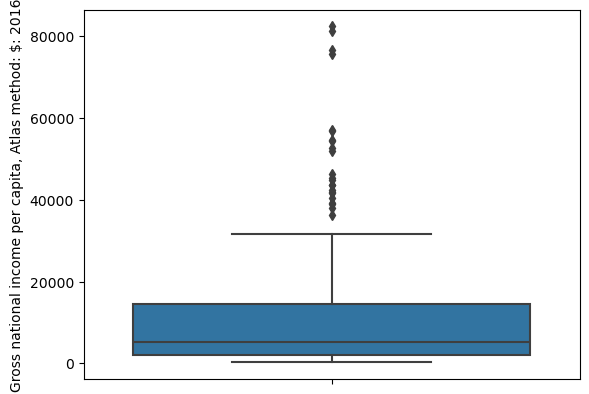

In [29]:
sns.boxplot(data=wb, y='Gross national income per capita, Atlas method: $: 2016');

In a box plot, the width of the box at any point does not encode meaning

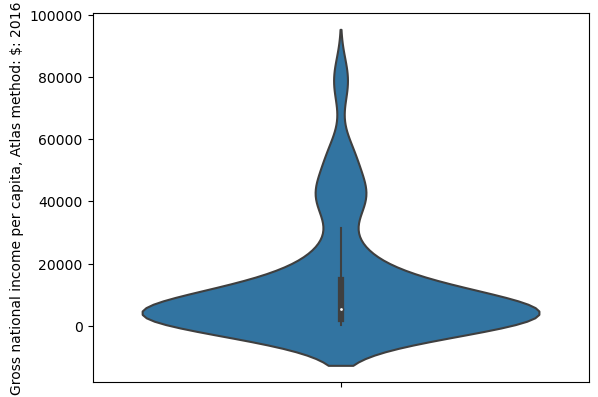

In [30]:
sns.violinplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016");

In a violin plot, the width of the plot indicates the density of the distribution at each possible value

#### **Quartiles**

A quartile represents a $25\%$ portion of the data:

* First Quartile ($Q1$) represents the $25th$ percentile, where $25\%$ of the data is smaller than or equal to the first quartile 

* Second Quartile ($Q2$) represents the $50th$ percentile, also known as the **median**, where $50\%$ of the data is smaller than or equal to the second quartile 

* Third Quartile ($Q1$) represents the $75th$ percentile, where $75\%$ of the data is smaller than or equal to the third quartile 

The middle $50\%$ of our data lies between $Q1$ and $Q3$, which we denote as the **Interquartile Range**



/Users/bing/miniconda3/envs/UDUB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bing/miniconda3/envs/UDUB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


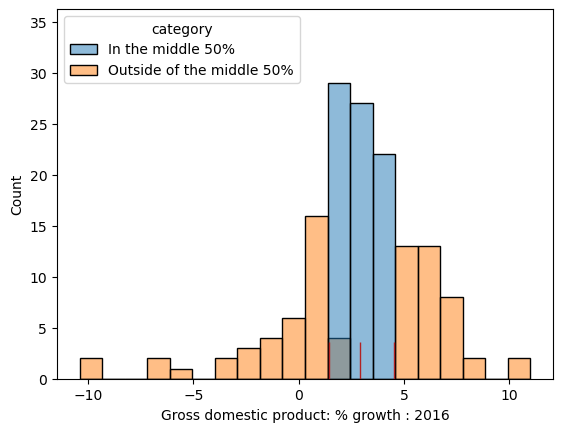

In [31]:
gdp = wb['Gross domestic product: % growth : 2016']
gdp = gdp[~gdp.isna()]

q1, q2, q3 = np.percentile(gdp, [25, 50, 75])

wb_quartiles = wb.copy()
wb_quartiles['category'] = None
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] < q1) | (wb_quartiles['Gross domestic product: % growth : 2016'] > q3), 'category'] = 'Outside of the middle 50%'
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] > q1) & (wb_quartiles['Gross domestic product: % growth : 2016'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(wb_quartiles, x="Gross domestic product: % growth : 2016", hue="category")
sns.rugplot([q1, q2, q3], c="firebrick", lw=6, height=0.1);

In a box plot, as the one below, the lower extent lies at $Q1$ and the upper extent lies at $Q3$. The horizontal lie corresponds to $Q2$

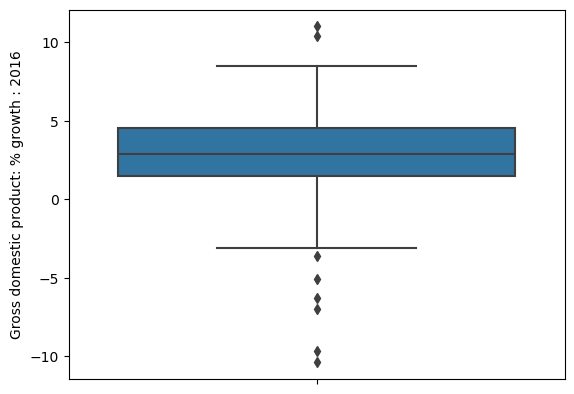

In [32]:
sns.boxplot(data=wb, y='Gross domestic product: % growth : 2016');

Here is a breakdown of all the information in a box plot: 

<img src="https://ds100.org/course-notes/visualization_1/images/box_plot_diagram.png" alt="Line Chart" style="display:inline-block; margin-right:10px; width:500px; height=550px;">


A violin plot more subtly displays quartile information, you just have to look a bit more carefully!

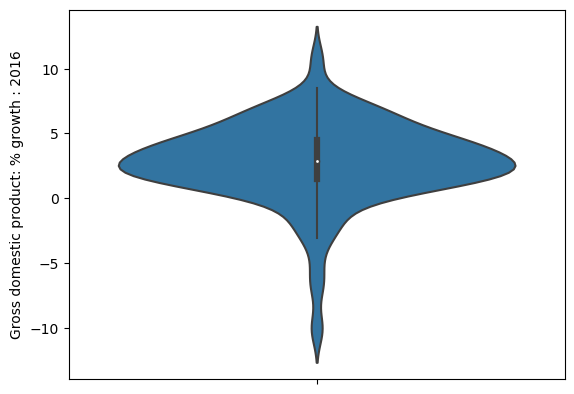

In [33]:
sns.violinplot(data=wb, y='Gross domestic product: % growth : 2016');

### **7.6.2 Side-by-Side Box and Violin Plots**

If we want to compare distributions across different categories, we can do so using side-by-side plots

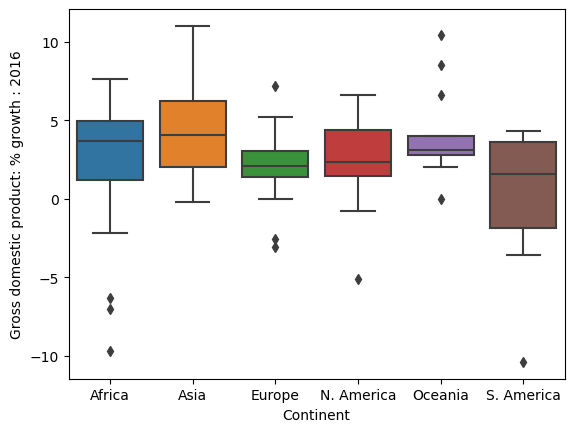

In [34]:
sns.boxplot(data=wb, x="Continent", y='Gross domestic product: % growth : 2016');

### **7.6.3 Histograms**

A histogram collects data into bins, then plots this binned data. Each bin reflects the density of datapoints within the specific left and right ends of the bin 

In other words, the **area** of each bin is proportional to the **percentage** of datapoints it contains

/Users/bing/miniconda3/envs/UDUB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


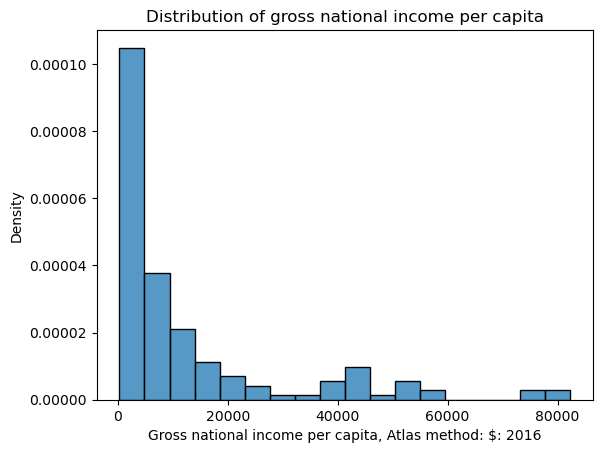

In [35]:
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", stat="density")
plt.title("Distribution of gross national income per capita");

We can also make use of **overlaid histograms**, in order to compare distributions across qualitative categories

* We can use the `hue` parameter of `sns.histplot` in order to specify the columns that should be used to determine the color of each category

/Users/bing/miniconda3/envs/UDUB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


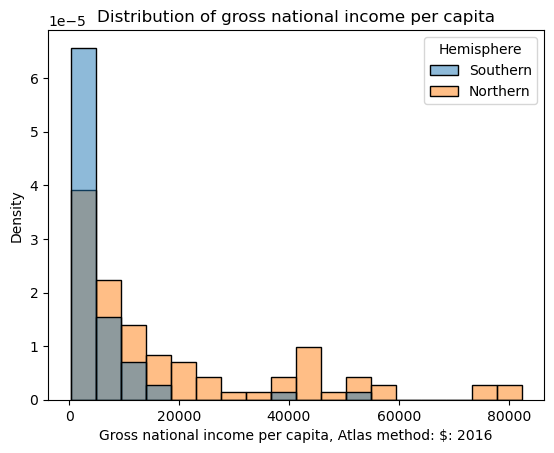

In [36]:
# Create a new variable to store the hemisphere in which each country is located
north = ["Asia", "Europe", "N. America"]
south = ["Africa", "Oceania", "S. America"]
wb.loc[wb["Continent"].isin(north), "Hemisphere"] = "Northern"
wb.loc[wb["Continent"].isin(south), "Hemisphere"] = "Southern"

sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", hue="Hemisphere", stat="density")
plt.title("Distribution of gross national income per capita");

#### **Skewness and Tails**

* The skew of a histograme describe the direction in which its "tail" extends. 

* Based on the skewness of a histogram, we can also make conclusions about its **mean** and **median**

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEu1sWYqzXSGvT4rRdM58POKS58Wr62DFWTXQV1LnVKA&s" alt="Line Chart" style="display:inline-block; margin-right:10px; width:500px; height=550px;">



/Users/bing/miniconda3/envs/UDUB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution with a long right tail')

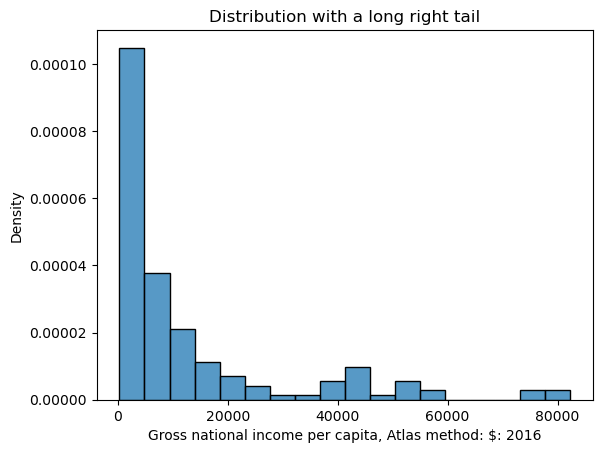

In [37]:
sns.histplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016', stat = 'density');
plt.title('Distribution with a long right tail')

/Users/bing/miniconda3/envs/UDUB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution with a long left tail')

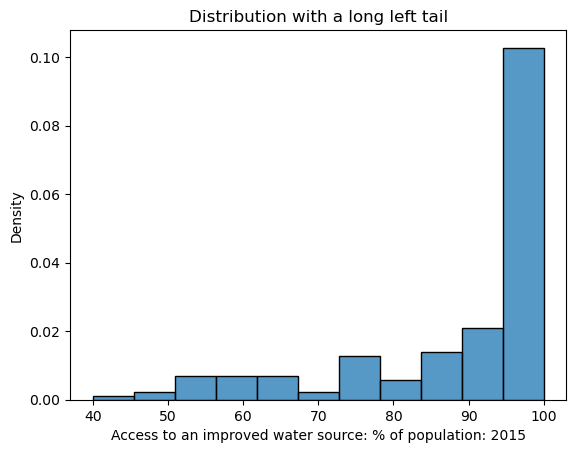

In [38]:
sns.histplot(data = wb, x = 'Access to an improved water source: % of population: 2015', stat = 'density');
plt.title('Distribution with a long left tail')

##### **Outliers** 

We define an **outlier** as a data point that lies an abnormally large distance away from other values 

The formal way we quantify outlier is through the formula: 
*  Values that are $<$ than $[Q1 - 1.5 \cdot IQR]$
*  Values that are $>$ than $[Q3 + 1.5 \cdot IQR]$

##### **Mode** 

* We define mode as the "peak" of a distribution.

* Since the number of bins may vary across distributions, it may be harder to visualize what counts as the "peak"

* Consider the following three plots: 

/Users/bing/miniconda3/envs/UDUB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


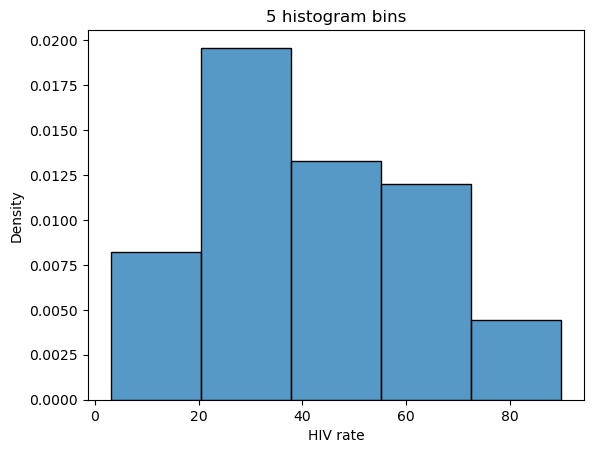

In [39]:
# Rename the very long column name for convenience
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate"})
# With 5 bins, it seems that there is only one peak
sns.histplot(data=wb, x="HIV rate", stat="density", bins=5)
plt.title("5 histogram bins");

/Users/bing/miniconda3/envs/UDUB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


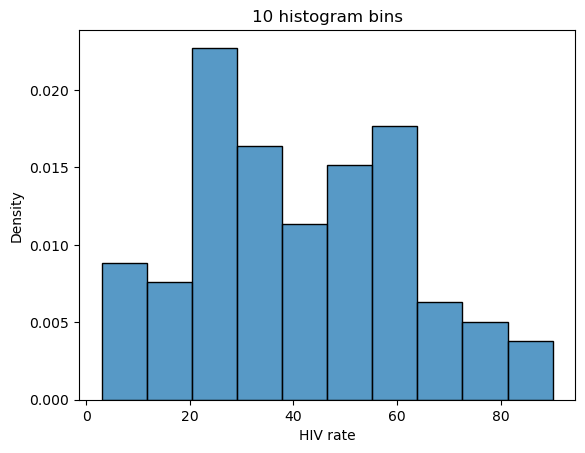

In [40]:
# With 10 bins, there seem to be two peaks

sns.histplot(data=wb, x="HIV rate", stat="density", bins=10)
plt.title("10 histogram bins");

/Users/bing/miniconda3/envs/UDUB/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


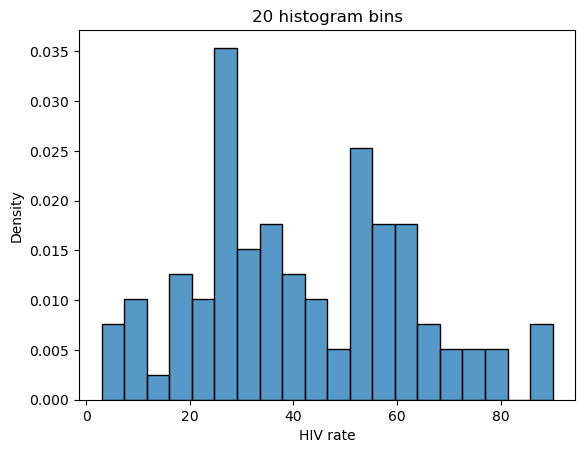

In [41]:
# And with 20 bins, it becomes hard to say what counts as a "peak"!

sns.histplot(data=wb, x ="HIV rate", stat="density", bins=20)
plt.title("20 histogram bins");

These ambiguities motivate us to consider using **Kernel Density Estimation** (KDE)